<a href="https://colab.research.google.com/github/YuningW/USYD_QBUS6810/blob/main/0521_forest_model_with_fashion_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification 要求：

1. 
- bank - kaggle competition
    - bank_train: 有target
    - bank_test: 没有target
        
- store
    - 自己进行train_ test_split
    - 自己定义一个loss function
    - model selection and model evaluation

2. 两个数据都要做的：
    - 至少5个模型的预测，至少一个linear model（logistic），至少一个tree- based，
      至少一个model average or model stack
      
    - Data mining：至少三个quantitative的结论，什么样的人对maketing campaign的
      response更 positive
    

#environment preparation

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/'ColabNotebooks'/Qbus6810/

'assignment 1'			    __pycache__
 bank_dictionary.xlsx		   'QBUS6810 EDA_0517.ipynb'
 bank_sample_submission.csv	   'QBUS6810 EDA.ipynb'
 bank_test.csv			    store.csv
 bank_test.gsheet		    store_dictionary.xlsx
 bank_train.csv			    tutorial4.py
'Classification Project.pdf'	    tutorial9.py
'forest_model_QBUS6810 EDA.ipynb'  'yannis QBUS6810 bank logit_0518.ipynb'


## Import Packages

In [2]:
!pip install phik

     |████████████████████████████████| 690 kB 4.5 MB/s 
     |████████████████████████████████| 38.1 MB 157 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 252 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=1aa518bedd894855535def31ff75a67dab2b01035fd53fddb8d2ba1b8fcd8dac
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [4]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [5]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 34.9 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 146 kB 48.7 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 112 kB 68.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=7f959cbdcf104515975de68f8774346e5d60c2877a4674ab9636a2199c7d73df
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import phik
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [7]:
4
!pip install numpy==1.21.5
!pip install scipy==1.7.1
!pip install pandas==1.3.4
!pip install graphviz==0.19.1

     |████████████████████████████████| 15.7 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 28.5 MB 1.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 4.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


     |████████████████████████████████| 46 kB 2.0 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [8]:
import scipy
import sklearn
import graphviz
import dtreeviz
import optuna
import shap

In [9]:
# Methods


# Model selection and evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss

In [10]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 180)

# Fashion Store

## 2.1 Loading data

In [14]:
fc = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Qbus6810/store.csv')

## 2.2 Preliminary Step

In [15]:
fc.head()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,1028,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,1056,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,1118,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1107,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [ ]:
fc.shape

(21740, 48)

In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZIP_CODE      21740 non-null  int64  
 1   FRE           21740 non-null  int64  
 2   MON           21740 non-null  float64
 3   CC_CARD       21740 non-null  int64  
 4   AVRG          21740 non-null  float64
 5   PC_CALC20     21740 non-null  int64  
 6   PSWEATERS     21740 non-null  float64
 7   PKNIT_TOPS    21740 non-null  float64
 8   PKNIT_DRES    21740 non-null  float64
 9   PBLOUSES      21740 non-null  float64
 10  PJACKETS      21740 non-null  float64
 11  PCAR_PNTS     21740 non-null  float64
 12  PCAS_PNTS     21740 non-null  float64
 13  PSHIRTS       21740 non-null  float64
 14  PDRESSES      21740 non-null  float64
 15  PSUITS        21740 non-null  float64
 16  POUTERWEAR    21740 non-null  float64
 17  PJEWELRY      21740 non-null  float64
 18  PFASHION      21740 non-nu

In [ ]:
# Check missing value
fc.isnull().sum()

ZIP_CODE        0
FRE             0
MON             0
CC_CARD         0
AVRG            0
PC_CALC20       0
PSWEATERS       0
PKNIT_TOPS      0
PKNIT_DRES      0
PBLOUSES        0
PJACKETS        0
PCAR_PNTS       0
PCAS_PNTS       0
PSHIRTS         0
PDRESSES        0
PSUITS          0
POUTERWEAR      0
PJEWELRY        0
PFASHION        0
PLEGWEAR        0
PCOLLSPND       0
AMSPEND         0
PSSPEND         0
CCSPEND         0
AXSPEND         0
TMONSPEND       0
OMONSPEND       0
SMONSPEND       0
PREVPD          0
GMP             0
PROMOS          0
DAYS            0
FREDAYS         0
MARKDOWN        0
CLASSES         0
COUPONS         0
STYLES          0
STORES          0
VALPHON         0
WEB             0
MAILED          0
RESPONDED       0
RESPONSERATE    0
HI              0
LTFREDAY        0
CLUSTYPE        0
PERCRET         0
RESP            0
dtype: int64

## Model training (tree based)

### Feature preprocess

#### transform

In [73]:
#preprocess the data 
#first we make binaray data into 0 and 1


#first replace non numerical data
phone_dict = {'Y':1, 'N':0}
fc['VALPHON'] = fc['VALPHON'].replace(phone_dict)
print(fc['VALPHON'])

#put feature into different type
binary = ['CC_CARD','VALPHON','WEB']
categorical = ['CLUSTYPE']
continuous = []
response = ['RESP']
for n in list(fc.columns):
  if n not in (binary+categorical+response):
    continuous.append(n)

print(continuous)


0        0
1        1
2        0
3        1
4        1
        ..
21735    1
21736    0
21737    0
21738    1
21739    1
Name: VALPHON, Length: 21740, dtype: int64
['ZIP_CODE', 'FRE', 'MON', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'PERCRET']


In [74]:
print(len(binary))
print(len(categorical))
print(len(continuous))
print(len(list(fc.columns)))

3
1
43
48


In [21]:
# transform continuous data -use YJ transformation?

#### train-test-split

In [75]:
response = 'RESP'
predictors = list(binary + continuous + categorical)
index_train, index_valid  = train_test_split(np.array(fc.index), stratify=fc['RESP'], 
                                            train_size=0.8, random_state=1)

train = fc.loc[index_train,].copy()
valid = fc.loc[index_valid,:].copy()

y_train = train['RESP']
y_valid = valid['RESP']

In [76]:
X_train = train[predictors]
X_valid = valid[predictors]

### tree model building

- decision tree 
- random forest

#### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from dtreeviz.trees import *

In [78]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5)

In [79]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def dt_objective(trial):
    
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 25)
    max_features = trial.suggest_int('max_features', 1, 30)
    max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        
    model = DecisionTreeClassifier(criterion = criterion, max_features= max_features, 
                                   max_depth=max_depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)
    
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'precision')
    loss = 1 - np.mean(scores)
    
    return loss

sampler = TPESampler(seed=1) 
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(dt_objective, n_trials = 150, timeout = 360) 

[I 2022-05-21 05:14:15,971] A new study created in memory with name: no-name-ac4799ba-4636-4aa2-af22-cf7850f28f53
[I 2022-05-21 05:14:16,401] Trial 0 finished with value: 0.5110396127352448 and parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 11, 'min_samples_split': 3}. Best is trial 0 with value: 0.5110396127352448.
[I 2022-05-21 05:14:17,584] Trial 1 finished with value: 0.5451885908758646 and parameters: {'criterion': 'gini', 'min_samples_leaf': 11, 'max_features': 17, 'max_depth': 23, 'min_samples_split': 15}. Best is trial 0 with value: 0.5110396127352448.
[I 2022-05-21 05:14:18,862] Trial 2 finished with value: 0.5803764512597612 and parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'max_features': 21, 'max_depth': 22, 'min_samples_split': 12}. Best is trial 0 with value: 0.5110396127352448.
[I 2022-05-21 05:14:22,008] Trial 3 finished with value: 0.5136709517945672 and parameters: {'criterion': 'gini', 'min_samples_leaf': 21, 'max

In [80]:
#bset param
params_dt = study.best_params
params_dt

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 6}

In [81]:
#train with best param
dt_fc = DecisionTreeClassifier(**params_dt) 
dt_fc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=15, min_samples_split=6)

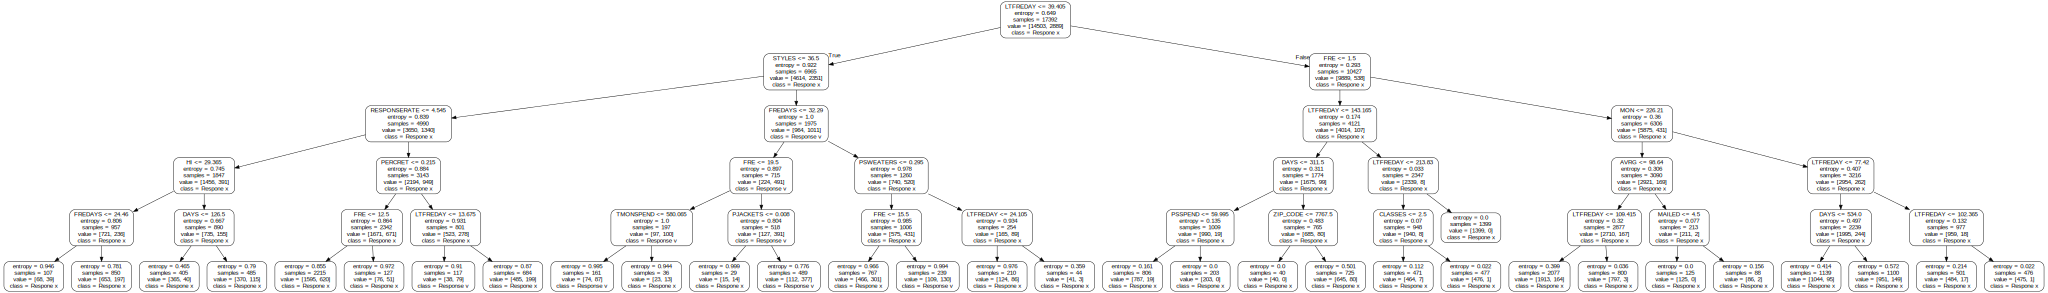

In [82]:
#final tree for dt
tree_graph = export_graphviz(dt_fc, out_file=None , impurity=True, feature_names = predictors,
                           class_names=['Respone x','Response v'], rounded=True) 
graph = graphviz.Source(tree_graph)
graph.render('dt_fc1') # saves tree to a file
graph

####Random Forest
- utilize bagging 
- hyperparameter tuning
- final random tree

##### bagging trees

In [83]:
from sklearn.ensemble import BaggingClassifier

bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1500, random_state=1)
bag1.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=1500, random_state=1)

##### build random forest tree with optuna

In [84]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def rf_objective(trial):
    
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    max_features = trial.suggest_int('max_features', 1, 30)
    
    
    model = RandomForestClassifier(n_estimators = 350,  
                                  criterion = criterion,  
                                  max_features = max_features, 
                                  min_samples_leaf= min_samples_leaf,
                                  random_state = 1)
    
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    loss = 1 - np.mean(scores)
    
    return loss

sampler = TPESampler(seed=1) 
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(rf_objective, n_trials = 300, timeout = 360) 


[I 2022-05-21 05:29:18,654] A new study created in memory with name: no-name-f69a44a3-ca5e-44ca-813f-dd2e4ed188f0
[I 2022-05-21 05:31:39,132] Trial 0 finished with value: 0.14443415607420929 and parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_features': 10}. Best is trial 0 with value: 0.14443415607420929.
[I 2022-05-21 05:34:31,172] Trial 1 finished with value: 0.14483648791624293 and parameters: {'criterion': 'entropy', 'min_samples_leaf': 5, 'max_features': 11}. Best is trial 0 with value: 0.14443415607420929.
[I 2022-05-21 05:37:55,137] Trial 2 finished with value: 0.1429966804854429 and parameters: {'criterion': 'gini', 'min_samples_leaf': 11, 'max_features': 21}. Best is trial 2 with value: 0.1429966804854429.


In [85]:
#bset param
params_rf = study.best_params
params_rf

{'criterion': 'gini', 'max_features': 21, 'min_samples_leaf': 11}

In [86]:
#train with best param
rf_fc = RandomForestClassifier(n_estimators=2000, **params_rf) #Bootstrapping 2500 data sets
rf_fc.fit(X_train, y_train)

RandomForestClassifier(max_features=21, min_samples_leaf=11, n_estimators=2000)

### Check model performance

In [87]:
#base model here
from sklearn.linear_model import LogisticRegressionCV 
logit = LogisticRegressionCV()
logit.fit(X_train, y_train)

LogisticRegressionCV()

In [88]:
#next plot out a trees that we have trained from the previous sections and check which one perform the best
columns=['Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross-entropy']
rows=['Logistic', 'Decision Tree','Bagging tree','Random forests']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logit, dt_fc, bag1, rf_fc]

y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):
    
    y_prob[:, i] = method.predict_proba(X_valid)[:, 1]
    y_pred = method.predict(X_valid)
        
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 

    results.iloc[i,0] =  1 - accuracy_score(y_valid, y_pred)
    results.iloc[i,1] =  tp/(tp+fn)
    results.iloc[i,2] =  tn/(tn+fp)
    results.iloc[i,3] =  precision_score(y_valid, y_pred)
    results.iloc[i,4] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,5] =  log_loss(y_valid, y_prob[:,i])
   

results.round(3)

,Error Rate,Sensitivity,Specificity,Precision,AUC,Cross-entropy
Logistic,0.150,0.219,0.976,0.645,0.845,0.336
Decision Tree,0.153,0.212,0.973,0.612,0.826,0.346
Bagging tree,0.141,0.313,0.968,0.659,0.847,0.331
Random forests,0.139,0.296,0.973,0.688,0.851,0.327


In [89]:
import sys
# Add folder path to the sys.path list
sys.path.append('/content/drive/My Drive/ColabNotebooks/Qbus6810/') 

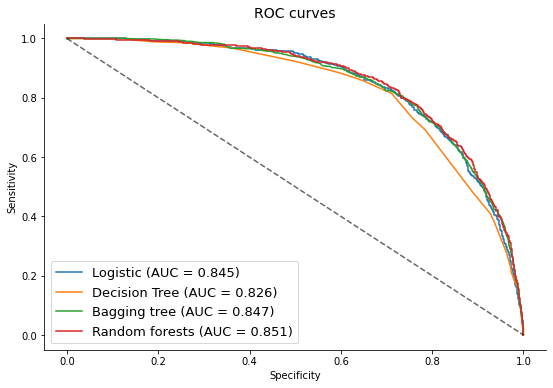

In [90]:
from tutorial9 import plot_roc_curves

fig, ax = plot_roc_curves(y_valid, y_prob, labels=pd.Series(rows))
plt.show()

### Model interpretaiton

In [91]:
%%time 

shap.initjs()
explainer = shap.Explainer(rf_fc)
shap_values = explainer.shap_values(X_valid.iloc[:1000, :])

# SHAP needs background data to compute SHAP values
# We use only part of the validation set to save time

CPU times: user 8min 7s, sys: 2.01 s, total: 8min 9s
Wall time: 8min 7s


some global explaination for our random forest

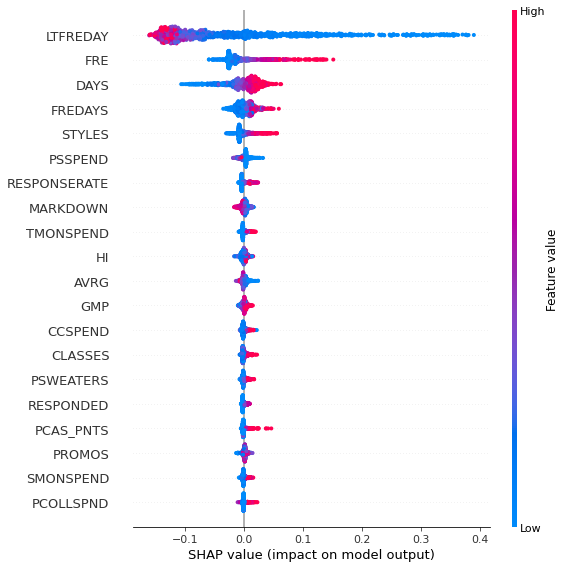

In [92]:
shap_values = explainer.shap_values(X_valid.iloc[:1000, :])
shap.summary_plot(shap_values[1], X_valid.iloc[:1000, :])

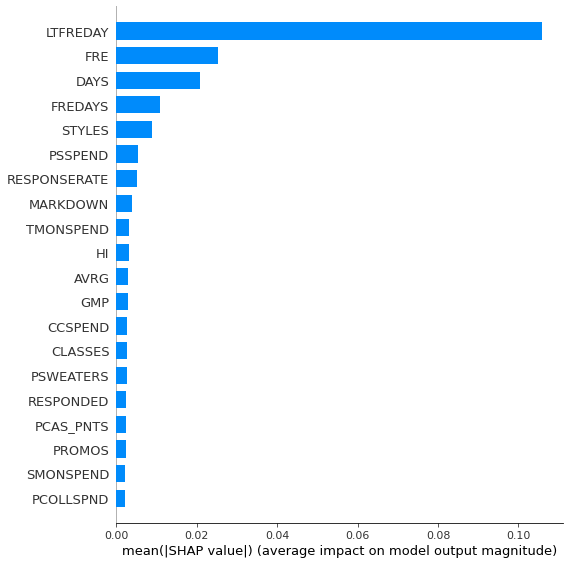

In [93]:
# use barplot to easily identified the most important feature and later we can retrain our data with these features
shap.summary_plot(shap_values[1], X_valid.iloc[:1000, :], plot_type = 'bar')

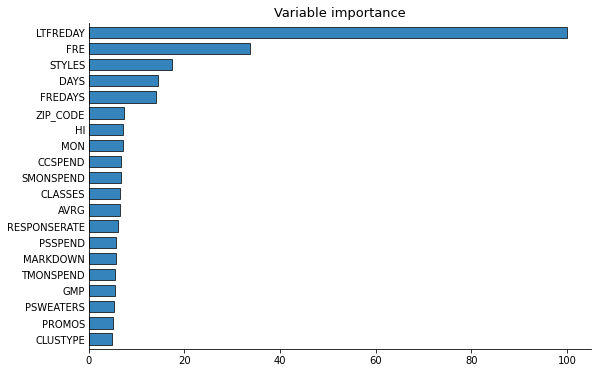

In [94]:
#use a standard way of plotting feature importance through tutorial9 's ploting package
from tutorial9 import plot_feature_importance
plot_feature_importance(rf_fc, predictors)
plt.show()